In [2]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [3]:
#data frame for legal status and pop
hr_df = pd.read_csv("parsed.csv")
hr_df.count()

Reviewer_Nationality    181700
Negative_Review         181700
Content_Parsed          181700
dtype: int64

In [5]:
hr_df.head()

,Reviewer_Nationality,Negative_Review,Content_Parsed
0,Australia,Rooms are nice but for elderly a bit difficul...,room nice elderly bite difficult room ...
1,Australia,We had issues with our electronic key everyda...,issue electronic key everyday deactivate...
2,Australia,it s a shame about all the construction going...,shame construction go look like be...
3,Australia,Foyer was a mess Only place to relax was the ...,foyer mess place relax bar comforta...
4,Australia,Room could have done with a microwave our roo...,room could microwave room small leak ...


In [6]:
X = hr_df["Content_Parsed"].values.astype("U")
y = hr_df["Reviewer_Nationality"]
print(X.shape, y.shape)

(181700,) (181700,)


In [7]:
X[0],y[0]

(' room  nice   elderly  bite difficult   room  two story  narrow step  ask  single level inside  room    basic  tea coffee  boiler   bar empty fridge ',
 'Australia')

In [8]:
print(hr_df["Reviewer_Nationality"].value_counts())

UnitedKingdom            121946
UnitedStatesofAmerica     16661
Australia                  9949
Ireland                    7302
UnitedArabEmirates         4749
Switzerland                4650
Netherlands                4595
Germany                    4236
Canada                     3894
SaudiArabia                3718
Name: Reviewer_Nationality, dtype: int64


In [9]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

In [11]:
# Function to calculate accuracy , confusion matrix, classification report
def cal_accuracy(y_test, y_pred): 
      
    print("""\nConfusion Matrix: \n""", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("\nAccuracy : \n", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("\nClassification Report : \n", 
    classification_report(y_test, y_pred))

In [12]:
# Function to calculate accuracy score
def model_accuracy(y_test, y_pred): 
        return accuracy_score(y_test,y_pred)*100

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
# Naive Bayes Model
clf = MultinomialNB()
# Model Fit
clf.fit(X_train,y_train)
# Model Score
clf.score(X_test,y_test)
# Model Prediction
y_pred = clf.predict(X_test)
# Model Accuracy
cal_accuracy(y_test, y_pred)
NB_accuracy = model_accuracy(y_test, y_pred)


Confusion Matrix: 
 [[   69     0     0     3     1     0     3     1  2919   206]
 [   13     3     2     3     0     2     2     4   976   273]
 [   12     1    11     5     5     4     7     2  1143   177]
 [    9     0     0    16     1     1     0     3  2230    93]
 [   13     0     6     3    27     2     2     4  1320   155]
 [    8     1     3     5     1    27     7    31  1057   168]
 [   15     0    11     6     3     1    12     5  1288   184]
 [   10     0     3     6     1    14     4    21  1399   145]
 [  153     3    12    85    20     7    24    32 39181   733]
 [   25     5     1    10     5     4     3     8  3828  1654]]

Accuracy : 
 68.4128016544087

Classification Report : 
                        precision    recall  f1-score   support

            Australia       0.21      0.02      0.04      3202
               Canada       0.23      0.00      0.00      1278
              Germany       0.22      0.01      0.02      1367
              Ireland       0.11     

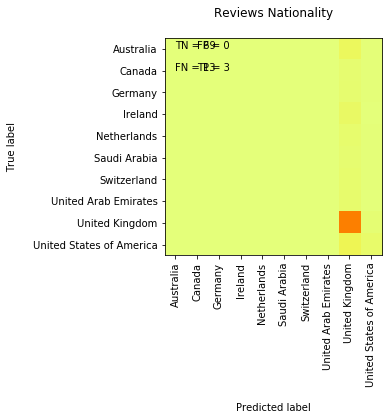

In [15]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Australia','Canada','Germany','Ireland','Netherlands','Saudi Arabia', 'Switzerland','United Arab Emirates','United Kingdom','United States of America']
plt.title('Reviews Nationality\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [16]:
#Random FOrest
from sklearn import tree

In [17]:
# Decision Tree Model
tree_clf = tree.DecisionTreeClassifier()
# Model Fit
tree_clf = tree_clf.fit(X_train,y_train)
# Model score
tree_clf.score(X_test, y_test)
# Model Predict
y_tree_predicted = tree_clf.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_tree_predicted)
DT_accuracy = model_accuracy(y_test, y_tree_predicted)


Confusion Matrix: 
 [[  243    46    45   114    49    51    60    49  2266   279]
 [   66    48    21    46    27    28    42    27   754   219]
 [   53    33    51    45    56    41    44    34   851   159]
 [  100    32    33    85    36    21    43    42  1805   156]
 [   74    32    35    53    86    35    48    38   949   182]
 [   48    29    25    41    36    67    32    64   811   155]
 [   75    31    49    40    47    41    54    34   980   174]
 [   63    37    26    47    46    52    45    68  1026   193]
 [ 1564   473   533  1295   560   435   574   610 31922  2284]
 [  292   160   119   153   139   126   161   124  3110  1159]]

Accuracy : 
 56.34162205433532

Classification Report : 
                        precision    recall  f1-score   support

            Australia       0.09      0.08      0.08      3202
               Canada       0.05      0.04      0.04      1278
              Germany       0.05      0.04      0.04      1367
              Ireland       0.04    

In [18]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_rf_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

NameError: name 'y_rf_predicted' is not defined

In [ ]:
##KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN Model
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    # Knn Model
    knn = KNeighborsClassifier(n_neighbors=k)
    # Model Fit
    knn.fit(X_train, y_train)
    # Model score
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Note that k: 29 provides the best accuracy where the classifier starts to stablize
# Model
knn = KNeighborsClassifier(n_neighbors=29)
# Model Fit
knn.fit(X_train, y_train)
print("K= 29")
# Model Predict
y_knn_predicted = knn.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_knn_predicted)
KNN_accuracy = model_accuracy(y_test, y_knn_predicted)

In [ ]:
###LR

In [ ]:
# Logistic Regression Model
lr = LogisticRegression(random_state= 42)
# Model Fit
lr = lr.fit(X_train, y_train)
# Model Score
lr.score(X_test, y_test)
# Model Predict
y_lr_predicted = lr.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_lr_predicted)
LR_accuracy = model_accuracy(y_test, y_lr_predicted)